In [ ]:
#imports
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Matching


In [ ]:
from drive.MyDrive.CIS700 import maximum_matching as mm 
# importlib.reload(mm)

In [ ]:
## Read txt file containing list of edges
f = open("/content/drive/MyDrive/CIS700/edges_gmaps.txt", "r")
list_edges = f.readlines()
edges = [e.strip('(),\n').split(",") for e in list_edges]
num_nodes = max(set([int(node) for e in edges for node in e ]))+1
## Build adjacency matrix
adjacency_matrix = np.zeros((num_nodes,num_nodes))
adjacency_list = []
for e in edges:
  u = int(e[0])
  v = int(e[1])
  # symmetric
  if adjacency_matrix[u][v] == 0:
    adjacency_matrix[u][v] = 1
    adjacency_matrix[v][u] = 1
    adjacency_list.append([u,v])
print("Number of nodes", num_nodes)
print("Number of edges", len(adjacency_list))
adjacency_matrix

Number of nodes 1217
Number of edges 6924


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
## Compute the maximum matching
max_matching, num_matchings = mm.run_blossoms_algorithm(adjacency_matrix)

Number of matched edges : 178
Time taken : 2.9173953533172607


In [ ]:
# filter nodes with no matching
max_matching_filter = {k: v for k, v in max_matching.items() if (v is not None) and (k <= 201)}
unmatched_nodes = [k for k,v in max_matching.items() if v is None]
#  directed edges to undirected (1,2) and (2,1) --> (1,2)
matching_edges = dict()
for k,v in max_matching_filter.items():
  if v not in matching_edges and k not in matching_edges:
    matching_edges[k] = v

### With Privacy

In [ ]:
## Read txt file containing list of edges
f = open("/content/drive/MyDrive/CIS700/obfuscated_edges_gmaps.txt", "r")
list_edges = f.readlines()
edges = [e.strip('(),\n').split(",") for e in list_edges]
num_nodes = max(set([int(node) for e in edges for node in e ]))+1
## Build adjacency matrix
adjacency_matrix_p = np.zeros((num_nodes,num_nodes))
adjacency_list_p = []
for e in edges:
  u = int(e[0])
  v = int(e[1])
  # symmetric
  if adjacency_matrix_p[u][v] == 0:
    adjacency_matrix_p[u][v] = 1
    adjacency_matrix_p[v][u] = 1
    adjacency_list_p.append([u,v])
print("Number of nodes", num_nodes)
print("Number of edges", len(adjacency_list_p))
adjacency_matrix_p

Number of nodes 1218
Number of edges 3233


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
## Compute the maximum matching
max_matching_p, num_matchings_p = mm.run_blossoms_algorithm(adjacency_matrix_p)

Number of matched edges : 176
Time taken : 2.9123902320861816


In [ ]:
# filter nodes with no matching
max_matching_filter_p = {k: v for k, v in max_matching_p.items() if ((v is not None) and (k <= 201))}
unmatched_nodes_p = [k for k,v in max_matching_p.items() if v is None]
#  directed edges to undirected (1,2) and (2,1) --> (1,2)
matching_edges_p = dict()
for k,v in max_matching_filter_p.items():
  if v not in matching_edges_p and k not in matching_edges_p:
    matching_edges_p[k] = v

In [ ]:
len(matching_edges_p)

176

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


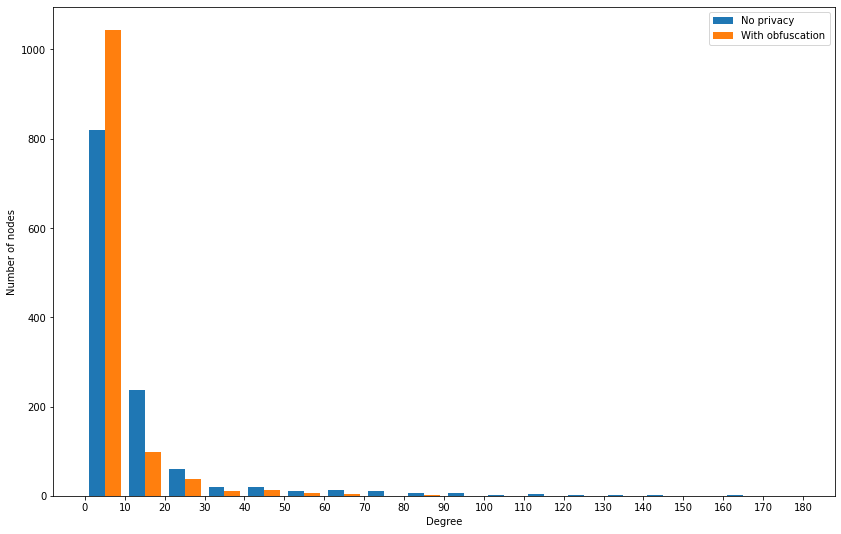

In [ ]:
degree_p = np.sum(adjacency_matrix_p,axis=1)
degree = np.sum(adjacency_matrix,axis=1)
plt.figure(figsize=(14,9))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
l = plt.hist([degree,degree_p], bins=18,range=(0,180));
plt.xticks(ticks=l[1]);
plt.legend(["No privacy", "With obfuscation"])

### Compare matching and network with and without privacy

In [ ]:
false_positive = 0
false_negative = 0
for i in range(201):
  u = i
  v = set(np.nonzero(adjacency_matrix[u])[0])
  v_p = set(np.nonzero(adjacency_matrix_p[u])[0])
  false_positive += len(v_p-v)
  false_negative += len(v-v_p)
print("false positive:", false_positive)
print("false negative:", false_negative)

false positive: 1827
false negative: 5477


In [ ]:
same = 0
different = 0
for i in range(201):
  if i in matching_edges:
    if i in matching_edges_p:
      v = set(np.nonzero(adjacency_matrix[i])[0])
      v_p = set(np.nonzero(adjacency_matrix_p[i])[0])
      if matching_edges_p[i] in v_p-v:
        different += 1
        # print(" i is ", i, "  with privacy", matching_edges_p[i], " before ", matching_edges[i])
      elif matching_edges_p[i] in v:
        same +=1
        # print("They are still same ", matching_edges[i], matching_edges_p[i])
print("same: ", same, " different ", different)

same:  80  different  85


### Compare quality of service

#### Load Original data 


In [ ]:
root = '/content/drive/MyDrive/CIS700/'
df = pd.read_csv(root + 'trip_data_1.csv',usecols=['medallion', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_time_in_secs', ' trip_distance',
       ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',
       ' dropoff_latitude'],nrows=3000)
df[' pickup_datetime'] = pd.to_datetime(df[' pickup_datetime'])
df[' dropoff_datetime'] = pd.to_datetime(df[' dropoff_datetime'])


In [ ]:
df.head()

,medallion,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2010000001,2010-01-01,2010-01-01 00:34:00,1,34.0,14.05,-73.948418,40.724590,-73.926140,40.864761
1,2010000002,2010-01-01,2010-01-01 00:33:00,1,33.0,9.65,-73.997414,40.736156,-73.997833,40.736168
2,2010000003,2010-01-01,2010-01-01 00:07:00,1,7.0,1.63,-73.967171,40.764236,-73.956299,40.781261
3,2010000004,2010-01-01,2010-01-01 00:33:00,1,33.0,26.61,-73.789757,40.646526,-74.136749,40.601543
4,2010000005,2010-01-01,2010-01-01 00:28:00,2,28.0,3.15,-73.999550,40.731152,-73.977448,40.763031


In [ ]:
df_p = pd.read_csv(root + 'obfuscated_trips_duration_included.csv',nrows=3000)
df_p[' pickup_datetime'] = pd.to_datetime(df_p[' pickup_datetime'])
df_p[' dropoff_datetime'] = pd.to_datetime(df_p[' dropoff_datetime'])

In [ ]:
df_p.head()

,Unnamed: 0,Unnamed: 0.1,medallion,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,fake_pickup_latitude,fake_pickup_longitude,pickup_walking_time,fake_dropoff_latitude,fake_dropoff_longitude,dropoff_walking_time,fake_pickup_datetime,fake_trip_time,fake_dropoff_datetime
0,0,0,2010000001,2010-01-01,2010-01-01 00:34:00,1,34.0,14.05,40.723399,-73.949490,0 days 00:02:45,40.864900,-73.926074,8.0,2010-01-01 00:02:45,0 days 00:26:35,2010-01-01 00:29:20
1,1,1,2010000002,2010-01-01,2010-01-01 00:33:00,1,33.0,9.65,40.737318,-73.997559,0 days 00:02:32,40.735948,-73.998387,32.0,2010-01-01 00:02:32,0 days 00:05:49,2010-01-01 00:08:21
2,2,2,2010000003,2010-01-01,2010-01-01 00:07:00,1,7.0,1.63,40.765021,-73.968171,0 days 00:01:55,40.782162,-73.956886,115.0,2010-01-01 00:01:55,0 days 00:07:26,2010-01-01 00:09:21
3,3,3,2010000004,2010-01-01,2010-01-01 00:33:00,1,33.0,26.61,40.646509,-73.789214,0 days 00:00:28,40.600819,-74.137460,133.0,2010-01-01 00:00:28,0 days 00:36:14,2010-01-01 00:36:42
4,4,4,2010000005,2010-01-01,2010-01-01 00:28:00,2,28.0,3.15,40.732366,-73.999223,0 days 00:02:19,40.761675,-73.977743,177.0,2010-01-01 00:02:19,0 days 00:12:50,2010-01-01 00:15:09


#### Analyzing walking time


In [ ]:
df_p['pickup_walking_time'] = pd.to_timedelta(df_p['pickup_walking_time'])
df_p['pickup_walking_time'] = df_p['pickup_walking_time'].apply(lambda x : x.seconds/60)

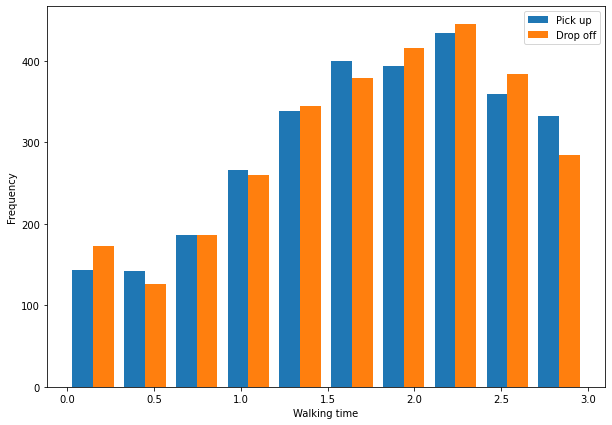

In [ ]:
df_p['dropoff_walking_time'] = df_p['dropoff_walking_time'].apply(lambda x : x/60)
plt.figure(figsize=(10,7))
plt.hist([df_p['dropoff_walking_time'], df_p['pickup_walking_time']]);
plt.xlabel("Walking time")
plt.ylabel("Frequency");
plt.legend(['Pick up', 'Drop off'])

In [ ]:
ind_no_obf = df_p.loc[df_p[' fake_pickup_latitude'] == 0.0].index
ind_no_obf, len(ind_no_obf)

(Int64Index([  36,   47,   77,  145,  147,  172,  203,  265,  278,  300,  341,
              489,  526,  623,  676,  677,  754,  842,  855,  883,  957, 1041,
             1046, 1080, 1164, 1184, 1207, 1258, 1330, 1525, 1544, 1548, 1599,
             1646, 1723, 1824, 1831, 1852, 2066, 2068, 2094, 2120, 2250, 2255,
             2281, 2336, 2386, 2395, 2408, 2472, 2494, 2579, 2668, 2703, 2770,
             2870, 2911],
            dtype='int64'), 57)

In [ ]:
edge_case = df.iloc[ind_no_obf]
edge_case.loc[df[' pickup_latitude'] != 0.0]
# 842 airport 
# 1041 airport
# 2094 airport
# 2281 airport
# 2668 


,medallion,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
265,2010000265,2010-01-01 00:03:00,2010-01-01 00:46:00,1,43.00,0.36,-748.000000,40.734730,-73.973480,40.764717
842,2010000837,2010-01-01 00:07:00,2010-01-01 00:25:00,3,18.00,7.23,-73.782135,40.644791,-73.751694,40.712452
1041,2010001029,2010-01-01 00:07:49,2010-01-01 00:21:04,1,13.25,10.30,-73.788696,40.647446,-73.872482,40.725815
2094,2010002020,2010-01-01 00:11:14,2010-01-01 00:39:28,1,28.23,1.10,-73.781990,40.644760,-73.912865,40.685734
2281,2010002191,2010-01-01 00:12:00,2010-01-01 00:48:00,1,36.00,21.87,-73.781242,40.644958,-74.004234,40.721954
2668,2010002535,2010-01-01 00:13:00,2010-01-01 00:38:00,1,25.00,14.16,-73.789673,40.647274,-73.946754,40.620720


### Visualization

In [ ]:
import gmplot

In [ ]:
!pip install gmplot

     |████████████████████████████████| 174kB 6.4MB/s 


In [ ]:
matching_nodes_u = list(matching_edges.keys())
matching_nodes_v = list(matching_edges.values())
# get the rows corresponding to the nodes in the matching
matching_loc_u = df.loc[matching_nodes_u,[' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',' dropoff_latitude',' pickup_datetime']]
matching_loc_v = df.loc[matching_nodes_v,[' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',' dropoff_latitude',' pickup_datetime']]
matching_loc_u.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_datetime
0,-73.948418,40.724590,-73.926140,40.864761,2010-01-01
1,-73.997414,40.736156,-73.997833,40.736168,2010-01-01
2,-73.967171,40.764236,-73.956299,40.781261,2010-01-01
3,-73.789757,40.646526,-74.136749,40.601543,2010-01-01
4,-73.999550,40.731152,-73.977448,40.763031,2010-01-01


In [ ]:
unmatched_nodes_df = df.loc[unmatched_nodes,[' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',' dropoff_latitude',' pickup_datetime']]
print(unmatched_nodes_df.shape)
unmatched_nodes_df.head()

(861, 5)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_datetime
10,-73.992805,40.741417,-73.995796,40.742596,2010-01-01 00:00:02
28,-73.999428,40.712158,-73.999161,40.712421,2010-01-01 00:00:23
36,0.000000,0.000000,0.000000,0.000000,2010-01-01 00:00:38
45,-73.956703,40.717289,-73.957603,40.708954,2010-01-01 00:00:46
47,0.000000,0.000000,0.000000,0.000000,2010-01-01 00:00:46


#### Map 0 - original edges for shareability network

In [ ]:
original_u = df.loc[[i for i in range(202)],[' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',' dropoff_latitude',' pickup_datetime', ' dropoff_datetime']]
original_v = df.loc[[i for i in range(202,1218,1)],[' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',' dropoff_latitude',' pickup_datetime', ' dropoff_datetime']]

In [ ]:
## map with a sample of edges from the shareability network 
gmap0 = gmplot.GoogleMapPlotter.from_geocode("New York City Center",apikey='')
gmap0.scatter(original_u[' pickup_latitude'], original_u[' pickup_longitude'], color= 'blue',size = 40, marker = False,label ="pickup time ")
gmap0.scatter(original_v[' pickup_latitude'], original_v[' pickup_longitude'], color= 'red',size = 20, marker = False,)

In [ ]:
for i in range(202):
  u = i
  v = np.nonzero(adjacency_matrix[u])[0]
  for j in v:
    path_lat = original_u.loc[u][' pickup_latitude'], df.loc[j][' pickup_latitude']
    path_long = original_u.loc[u][' pickup_longitude'], df.loc[j][' pickup_longitude']
    gmap0.plot(path_lat,path_long, edge_width=3,alpha=0.4)

In [ ]:
gmap0.draw('Original network with all the edges.html')

#### Map 1 - all trips without privacy


In [ ]:
# map with all the trips being considered
gmap1 = gmplot.GoogleMapPlotter.from_geocode("New York City Center",apikey='')
gmap1.scatter(matching_loc_u[' pickup_latitude'], matching_loc_u[' pickup_longitude'], color= 'red',size = 30, marker = False )
gmap1.scatter(matching_loc_v[' pickup_latitude'], matching_loc_v[' pickup_longitude'],color= 'red', size = 30, marker = False )
gmap1.scatter(unmatched_nodes_df[' pickup_latitude'], unmatched_nodes_df[' pickup_longitude'],color= 'red', size = 30, marker = False )
gmap1.draw('all_trips_without_privacy.html')


In [ ]:
gmap5 = gmplot.GoogleMapPlotter.from_geocode("New York City Center",apikey='')
gmap5.scatter(original_u[' pickup_latitude'], original_u[' pickup_longitude'], color= 'blue',size = 40, marker = False,label ="pickup time ")
gmap5.scatter(original_v[' pickup_latitude'], original_v[' pickup_longitude'], color= 'red',size = 20, marker = False,)

In [ ]:
for i in range(202):
  u = i
  v = np.nonzero(adjacency_matrix_p[u])[0]
  for j in v:
    path_lat = original_u.loc[u][' pickup_latitude'], df.loc[j][' pickup_latitude']
    path_long = original_u.loc[u][' pickup_longitude'], df.loc[j][' pickup_longitude']
    gmap5.plot(path_lat,path_long, edge_width=3,alpha=0.4)
gmap5.draw('Privacy enhanced network with all the edges.html')

#### Map 2 - trips that were matched without privacy


In [ ]:
gmap2 = gmplot.GoogleMapPlotter.from_geocode("New York City Center",apikey='')

In [ ]:
gmap2.scatter(matching_loc_u[' pickup_latitude'], matching_loc_u[' pickup_longitude'], color= 'blue',size = 60, marker = False )
gmap2.scatter(matching_loc_v[' pickup_latitude'], matching_loc_v[' pickup_longitude'],color= 'blue', size = 60, marker = False )
gmap2.scatter(unmatched_nodes_df[' pickup_latitude'], unmatched_nodes_df[' pickup_longitude'],color= 'red', size = 30, marker = False )


In [ ]:
for i in range(len(matching_nodes_u)):
  u = matching_nodes_u[i]
  v = matching_nodes_v[i]
  path_lat = matching_loc_u.loc[u][' pickup_latitude'], matching_loc_v.loc[v][' pickup_latitude']
  path_long = matching_loc_u.loc[u][' pickup_longitude'], matching_loc_v.loc[v][' pickup_longitude']
  gmap2.plot(path_lat,path_long, edge_width=3,alpha=0.4)

In [ ]:
gmap2.draw('trip_with_matching no privacy.html')

#### Map 3 - trips that were matched with privacy


In [ ]:
matching_nodes_u_p = list(matching_edges_p.keys())
matching_nodes_v_p = list(matching_edges_p.values())
# get the rows corresponding to the nodes in the matching
matching_loc_u_p = df_p.loc[matching_nodes_u_p,[' fake_pickup_longitude', ' fake_pickup_latitude', ' fake_dropoff_longitude',' fake_dropoff_latitude']]
matching_loc_v_p = df_p.loc[matching_nodes_v_p,[' fake_pickup_longitude', ' fake_pickup_latitude', ' fake_dropoff_longitude',' fake_dropoff_latitude']]
# matching_loc_u_p.head()

In [ ]:
unmatched_nodes_df_p = df_p.loc[unmatched_nodes_p,[' fake_pickup_longitude', ' fake_pickup_latitude', ' fake_dropoff_longitude',' fake_dropoff_latitude']]
print(unmatched_nodes_df_p.shape)
unmatched_nodes_df_p.head()

(866, 4)


,fake_pickup_longitude,fake_pickup_latitude,fake_dropoff_longitude,fake_dropoff_latitude
3,-73.789214,40.646509,-74.137460,40.600819
13,-73.984650,40.719440,-73.989688,40.714534
28,-73.999914,40.712064,-73.999160,40.713642
30,-73.953925,40.712846,-73.947599,40.715788
34,-73.977093,40.749603,-73.975892,40.748926


In [ ]:
gmap3 = gmplot.GoogleMapPlotter.from_geocode("New York City Center",apikey='')

In [ ]:
gmap3.scatter(matching_loc_u_p[' fake_pickup_latitude'], matching_loc_u_p[' fake_pickup_longitude'], color= 'blue',size = 60, marker = False )
gmap3.scatter(matching_loc_v_p[' fake_pickup_latitude'], matching_loc_v_p[' fake_pickup_longitude'],color= 'blue', size = 60, marker = False )
gmap3.scatter(unmatched_nodes_df_p[' fake_pickup_latitude'], unmatched_nodes_df_p[' fake_pickup_longitude'],color= 'red', size = 30, marker = False )


In [ ]:
for i in range(len(matching_nodes_u_p)):
  u = matching_nodes_u_p[i]
  v = matching_nodes_v_p[i]
  path_lat = matching_loc_u_p.loc[u][' fake_pickup_latitude'], matching_loc_v_p.loc[v][' fake_pickup_latitude']
  path_long = matching_loc_u_p.loc[u][' fake_pickup_longitude'], matching_loc_v_p.loc[v][' fake_pickup_longitude']
  gmap3.plot(path_lat,path_long, edge_width=3,alpha=0.4)

In [ ]:
gmap3.draw('trip_with_matching_with_privacy.html')

#### Obfuscation plot for some nodes

In [ ]:
# root = '/content/drive/MyDrive/CIS700/'
obs_df = pd.read_csv('/content/drive/MyDrive/CIS700/obfuscated_trips_duration_included.csv',nrows=3000)
obs_df[' pickup_datetime'] = pd.to_datetime(obs_df[' pickup_datetime'])
obs_df[' dropoff_datetime'] = pd.to_datetime(obs_df[' dropoff_datetime'])


In [ ]:
obs_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'medallion', ' pickup_datetime',
       ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs',
       ' trip_distance', ' fake_pickup_latitude', ' fake_pickup_longitude',
       'pickup_walking_time', ' fake_dropoff_latitude',
       ' fake_dropoff_longitude', 'dropoff_walking_time',
       'fake_pickup_datetime', ' fake_trip_time', 'fake_dropoff_datetime'],
      dtype='object')

In [ ]:
original_some = df.loc[[4,5,6],[' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',' dropoff_latitude',' pickup_datetime', ' dropoff_datetime']]
obs_some = obs_df.loc[[4,5,6],[' fake_pickup_latitude', ' fake_pickup_longitude']]


gmap5 = gmplot.GoogleMapPlotter.from_geocode("New York City Center",apikey='')
gmap5.scatter(original_some[' pickup_latitude'], original_some[' pickup_longitude'], color= 'red',size = 20, marker = False,alpha=0.8)
gmap5.scatter(obs_some[' fake_pickup_latitude'], obs_some[' fake_pickup_longitude'], color= 'black',size = 20, marker = False,alpha=0.8)
gmap5.circle(original_some[' pickup_latitude'][4], original_some[' pickup_longitude'][4], 250, color='cornflowerblue')
gmap5.circle(original_some[' pickup_latitude'][5], original_some[' pickup_longitude'][5], 250, color='cornflowerblue')
gmap5.circle(original_some[' pickup_latitude'][6], original_some[' pickup_longitude'][6], 250, color='cornflowerblue')

gmap5.draw("obfuscated.html")

#### Privacy 


In [ ]:
!pip install googlemaps
!pip install simplejson
!pip install --upgrade google-auth-oauthlib
!pip install Faker

In [ ]:
## Documentation https://faker.readthedocs.io/en/master/providers/faker.providers.geo.html
from faker import Faker
fake = Faker()

In [ ]:
## can use this heuristic to get an estimate of how far the obfuscated place is to the user and 
## compute the walking distance
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
day_df['obfuscated_latitude'] = day_df[' pickup_latitude'].apply(lambda x: fake.coordinate(center=str(x), radius=0.005))
day_df['obfuscated_longitude'] = day_df[' pickup_longitude'].apply(lambda x: fake.coordinate(center=str(x), radius=0.005))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
day_df['haversine(km)'] = day_df.apply(lambda row: haversine(row[' pickup_longitude'],row[' pickup_latitude'], row['obfuscated_longitude'], row['obfuscated_latitude']), axis=1)
day_df.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,medallion,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,obfuscated_latitude,obfuscated_longitude,haversine(km)
0,2010000001,2010-01-01,2010-01-01 00:34:00,1,34.0,14.05,-73.948418,40.724590,-73.926140,40.864761,40.721964,-73.947129,0.311548
1,2010000002,2010-01-01,2010-01-01 00:33:00,1,33.0,9.65,-73.997414,40.736156,-73.997833,40.736168,40.732061,-73.996734,0.458934
2,2010000003,2010-01-01,2010-01-01 00:07:00,1,7.0,1.63,-73.967171,40.764236,-73.956299,40.781261,40.760102,-73.969064,0.486543
3,2010000004,2010-01-01,2010-01-01 00:33:00,1,33.0,26.61,-73.789757,40.646526,-74.136749,40.601543,40.650453,-73.785481,0.566404
